In [3]:
import multiprocessing
import os

In [5]:
def worker1():
    print("ID of process running worker1: {}".format(os.getpid()))
def worker2():
    print("ID of process running worker2: {}".format(os.getpid()))
if __name__ == "__main__":
    print("ID of main process: {}".format(os.getpid()))
    p1 = multiprocessing.Process(target=worker1)
    p2 = multiprocessing.Process(target=worker2)
    p1.start()
    p2.start()
    print("ID of process p1: {}".format(p1.pid))
    print("ID of process p2: {}".format(p2.pid))
    p1.join()
    p2.join()
    print("Both processes finished execution!")
    print("Process p1 is alive: {}".format(p1.is_alive()))
    print("Process p2 is alive: {}".format(p2.is_alive()))

ID of main process: 27304
ID of process p1: 22860
ID of process p2: 28424
Both processes finished execution!
Process p1 is alive: False
Process p2 is alive: False


In [18]:
ls = []

def square_list(mylist, result, square_sum):
    for idx, num in enumerate(mylist):
        result[idx] = num * num
    square_sum.value = sum(result)
    print("Result(in process p1): {}".format(result[:]))
    print("Sum of squares(in process p1): {}".format(square_sum.value))

if __name__ == "__main__":
    mylist = [1,2,3,4]
    result = multiprocessing.Array('i', 4)
    square_sum = multiprocessing.Value('i')
    p1 = multiprocessing.Process(target=square_list, args=(mylist, result, square_sum))
    p1.start()
    p1.join()
    print("Result(in main program): {}".format(result[:]))
    print("Sum of squares(in main program): {}".format(square_sum.value))

Result(in main program): [0, 0, 0, 0]
Sum of squares(in main program): 0


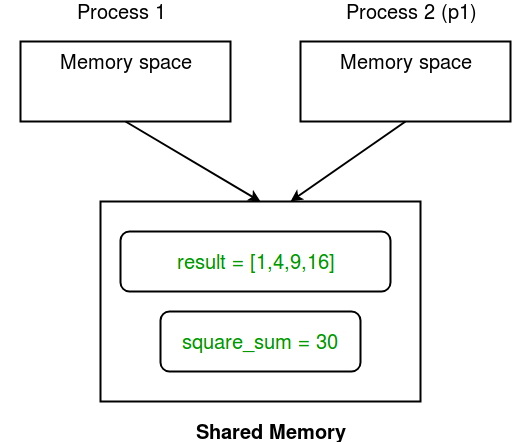

In [26]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/multiprocessing-python-2.png")

In [19]:
def print_records(records):
    """
    function to print record(tuples) in records(list)
    """
    for record in records:
        print("Name: {0}\nScore: {1}\n".format(record[0], record[1]))

def insert_record(record, records):
    """
    function to add a new record to records(list)
    """
    records.append(record)
    print("New record added!\n")

if __name__ == '__main__':
    with multiprocessing.Manager() as manager:
        # creating a list in server process memory
        records = manager.list([('Sam', 10), ('Adam', 9), ('Kevin',9)])
        # new record to be inserted in records
        new_record = ('Jeff', 8)
  
        # creating new processes
        p1 = multiprocessing.Process(target=insert_record, args=(new_record, records))
        p2 = multiprocessing.Process(target=print_records, args=(records,))
  
        # running process p1 to insert new record
        p1.start()
        p1.join()
  
        # running process p2 to print records
        p2.start()
        p2.join()

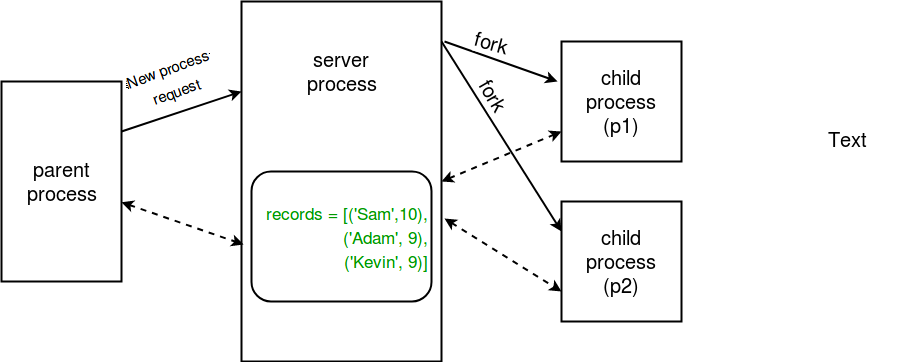

In [27]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/multiprocessing-python-3.png")

In [25]:
def square_list(mylist, q):
    # append squares of mylist to queue
    for num in mylist:
        q.put(num * num)
def print_queue(q):
    print("Queue elements:")
    while not q.empty():
        print(q.get())
    print("Queue is now empty!")
if __name__ == "__main__":
    mylist = [1,2,3,4]
    q = multiprocessing.Queue()
    p1 = multiprocessing.Process(target=square_list, args=(mylist, q))
    p2 = multiprocessing.Process(target=print_queue, args=(q,))
    p1.start()
    p1.join()
    p2.start()
    p2.join()

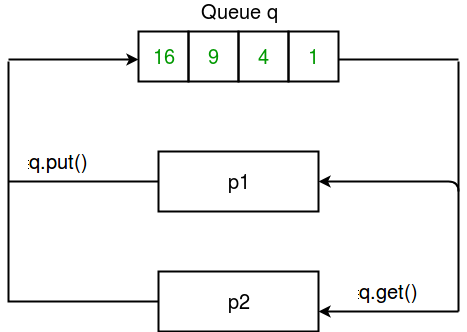

In [28]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/multiprocessing-python-4.png")

In [24]:
def sender(conn, msgs):
    for msg in msgs:
        conn.send(msg)
        print("Sent the message: {}".format(msg))
    conn.close()
def receiver(conn):
    while 1:
        msg = conn.recv()
        if msg == "END":
            break
        print("Received the message: {}".format(msg))
if __name__ == "__main__":
    msgs = ["hello", "hey", "hru?", "END"]
    parent_conn, child_conn = multiprocessing.Pipe()
    p1 = multiprocessing.Process(target=sender, args=(parent_conn,msgs))
    p2 = multiprocessing.Process(target=receiver, args=(child_conn,))
    p1.start()
    p2.start()
    p1.join()
    p2.join()

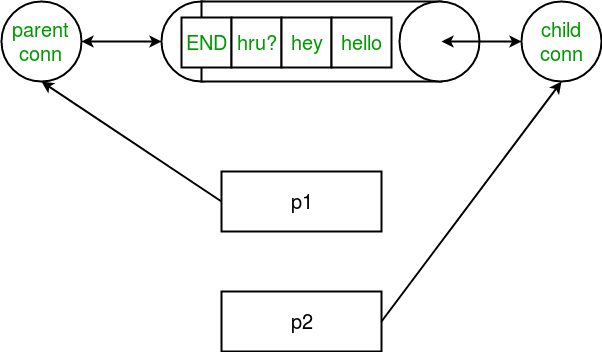

In [29]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/multiprocessing-python-5.png")